In [3]:
from pathlib import Path

import pandas as pd

import combine_rephrased
import read_and_write_docs

SyntaxError: invalid syntax (1601748168.py, line 5)

In [1]:
run "../combine_rephrased.py"

usage: combine_rephrased.py [-h] --unknown_file_path UNKNOWN_FILE_PATH
                            --rephrased_file_path REPHRASED_FILE_PATH
                            --output_file_path OUTPUT_FILE_PATH
                            [--num_impostors NUM_IMPOSTORS]
combine_rephrased.py: error: the following arguments are required: --unknown_file_path, --rephrased_file_path, --output_file_path


SystemExit: 2

In [ ]:
g_drive_base_loc = "/Users/user/Library/CloudStorage/GoogleDrive-benjcross1995@gmail.com/My Drive/"

In [ ]:
# Rephrased preprocessed data
# rephrased_preprocessed = f"{g_drive_base_loc}datasets/blogger_new_algorithm/rephrased_preprocessed.jsonl"
rephrased_preprocessed = "../../../datasets/blogger/raw/rephrased_preprocessed.jsonl"
preprocessed_df = read_and_write_docs.read_jsonl_file(rephrased_preprocessed)

In [8]:
# Get the list of files in the rephrased sentences loc
# rephrased_sentences_loc = f"{g_drive_base_loc}datasets/blogger_new_algorithm/rephrased_sentences/"
# rephrased_sentences_loc = "../../../datasets/blogger/phi_rephrased"
# rephrased_sentences_loc = "../../../datasets/blogger/batch_4o"
# rephrased_sentences_loc = "../../../datasets/blogger/batch_4o_parascore"
rephrased_sentences_loc = "../../../datasets/blogger/phi_parascore"

files = [file for file in Path(rephrased_sentences_loc).iterdir() if file.is_file() and file.suffix == '.jsonl']

In [10]:
preprocessed_df[preprocessed_df['doc_id'] == 350617]

,doc_id,author_id,gender,age,topic,sign,date,text,chunk_id
1590,350617,3960205,male,17,Student,Scorpio,"22,July,2004",Why does the Poet need a voice for his express...,1
1591,350617,3960205,male,17,Student,Scorpio,"22,July,2004",Why does the Poet clamor for attention during ...,2
1592,350617,3960205,male,17,Student,Scorpio,"22,July,2004",Why does the Poet fixate on one point of view ...,3
1593,350617,3960205,male,17,Student,Scorpio,"22,July,2004","Why does the Poet try to change, through all t...",4
1594,350617,3960205,male,17,Student,Scorpio,"22,July,2004","Why cannot the Poet, even after realising the ...",5
1595,350617,3960205,male,17,Student,Scorpio,"22,July,2004",Would the Poet at some time or another turn hi...,6
1596,350617,3960205,male,17,Student,Scorpio,"22,July,2004",Would the Poet make sure that torch would stil...,7
1597,350617,3960205,male,17,Student,Scorpio,"22,July,2004",Why does the Poet need to be an idealist?,8
1598,350617,3960205,male,17,Student,Scorpio,"22,July,2004",Why cannot the Poets pragmatism (practicality)...,9
1599,350617,3960205,male,17,Student,Scorpio,"22,July,2004",What makes the Poet continue on and on inspite...,10


In [11]:
def process_and_combine(old_df, file_paths, num_impostors=1000, score_table=False, score_col=None):
    """
    Process a list of file paths, filter the old DataFrame based on doc_id, 
    and combine the results into a single DataFrame.
    
    Parameters:
    - old_df: The old DataFrame to filter.
    - file_paths: List of file paths to process.
    - num_impostors: Parameter for the combine function.
    - score_table: Does the rephrased table have a score column.
    - score_col: If table has score column what is the column name.
    
    Returns:
    - result_df: Combined DataFrame.
    """
    
    result_dfs = []
    
    for file_path in file_paths:

        # Read the new DataFrame from the file
        new_df = read_and_write_docs.read_jsonl_file(file_path)
        
        new_df = new_df.rename(columns={
            'original': 'original_sentence', 
            'rephrased': 'result'})

        # Convert columns to numeric
        new_df['doc_id'] = pd.to_numeric(new_df['doc_id'], errors='coerce')
        new_df['chunk_id'] = pd.to_numeric(new_df['chunk_id'], errors='coerce')
        
        # Ensure 'doc_id' is in the DataFrame
        if 'doc_id' not in new_df.columns:
            raise ValueError(f"The file {file_path} does not contain a 'doc_id' column.")
        
        # Get the unique doc_id from the new DataFrame
        new_doc_id = int(new_df['doc_id'].unique()[0])

        # Filter the old DataFrame for the doc_id
        filtered_old_df = old_df[old_df['doc_id'] == new_doc_id].copy()
        print(f"Sampling Doc: {new_doc_id}")

        if score_table == False:
            # Combine the filtered old DataFrame with the new DataFrame
            combined_df = combine_rephrased.chunk_single_rephrased(filtered_old_df, new_df, num_impostors=num_impostors)
        else:
            combined_df = combine_rephrased.chunk_single_rephrased_with_scores_list(filtered_old_df, new_df,
                                                                                    score_col, num_impostors=num_impostors)
        
        # Append the combined DataFrame to the list of result DataFrames
        result_dfs.append(combined_df)
    
    # Concatenate all the result DataFrames into a single DataFrame
    result_df = pd.concat(result_dfs, ignore_index=True)
    
    return result_df

# Example usage:
# Assuming read_and_write_docs.read_jsonl_file and combine_rephrased.chunk_single_rephrased are defined
# result_df = process_and_combine(preprocessed_df, file_paths, read_and_write_docs.read_jsonl_file, combine_rephrased.chunk_single_rephrased)


In [12]:
test = [files[0]]

In [13]:
test

[PosixPath('../../../datasets/blogger/phi_parascore/doc_350617.jsonl')]

In [20]:
result = process_and_combine(preprocessed_df, test, num_impostors=1000,
                             score_table=True, score_col='parascore_free')

Sampling Doc: 350617


In [21]:
result

,doc_id,rephrased,average_score,score_list,original_sentence_list,rephrased_sentence_list
0,350617,A poet's clamor during expression could indica...,0.554366,"[0.525957465171814, 0.5524082779884338, 0.5685...",[Why does the Poet need a voice for his expres...,[A poet's clamor during expression could indic...
1,350617,It is possible that the poet yearns to break t...,0.531646,"[0.499971866607666, 0.5432113409042358, 0.6211...",[Why does the Poet need a voice for his expres...,[It is possible that the poet yearns to break ...
2,350617,The Poet's clamor during artistic expression i...,0.561094,"[0.5233567953109741, 0.5454875826835632, 0.599...",[Why does the Poet need a voice for his expres...,[The Poet's clamor during artistic expression ...
3,350617,Perhaps the poet feels a strong connection bet...,0.511613,"[0.5057719349861145, 0.5524082779884338, 0.553...",[Why does the Poet need a voice for his expres...,[Perhaps the poet feels a strong connection be...
4,350617,Why do poets seemingly seek out applause when ...,0.523323,"[0.6748082637786865, 0.5522770881652832, 0.533...",[Why does the Poet need a voice for his expres...,[Why do poets seemingly seek out applause when...
...,...,...,...,...,...,...
995,350617,The Poet seeks recognition when he expresses h...,0.568621,"[0.5448044538497925, 0.5832670331001282, 0.596...",[Why does the Poet need a voice for his expres...,[The Poet seeks recognition when he expresses ...
996,350617,The poet's fervent desire to be heard may stem...,0.524459,"[0.4760800898075104, 0.5197569727897644, 0.686...",[Why does the Poet need a voice for his expres...,[The poet's fervent desire to be heard may ste...
997,350617,The Poet eagerly seeks recognition while artic...,0.483062,"[0.5157122611999512, 0.6093593239784241, 0.686...",[Why does the Poet need a voice for his expres...,[The Poet eagerly seeks recognition while arti...
998,350617,Why do poets seemingly seek out applause when ...,0.576797,"[0.6748082637786865, 0.5832670331001282, 0.652...",[Why does the Poet need a voice for his expres...,[Why do poets seemingly seek out applause when...


In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib.textpath import TextPath
import matplotlib.transforms as transforms

# Create a colormap
cmap = plt.get_cmap('viridis')  # You can try other colormaps like 'viridis', 'plasma', etc.
norm = mpl.colors.Normalize(vmin=0, vmax=1)  # Normalize the scores between 0 and 1

# Function to plot highlighted paragraph
def plot_highlighted_paragraph(sentences, scores, cmap, norm):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_facecolor('white')
    ax.axis('off')

    # Start position
    x_position = 0.05
    y_position = 0.95

    # Maximum x position
    max_x = 0.95

    # Highlight the background of each sentence
    for i, sentence in enumerate(sentences):
        color = cmap(norm(scores[i]))  # Get background color based on score

        # Split the sentence into words
        words = sentence.split()

        # Highlight the background of each word
        for j, word in enumerate(words):
            # Create a text object to get the extent
            text = ax.text(x_position, y_position, word + " ", 
                            fontsize=10, ha='left', va='top', color='black')

            # Get the extent of the text
            bb = text.get_window_extent()
            bb = bb.transformed(ax.transData.inverted())
            x_start = bb.x0
            y_start = bb.y0
            x_end = bb.x0 + bb.width
            y_end = bb.y0 + bb.height

            # Create a rectangle patch
            rect = patches.Rectangle((x_start, y_start), x_end - x_start, y_end - y_start,
                                     facecolor=color, edgecolor='none', clip_on=False,
                                     alpha = 0.4)
            ax.add_patch(rect)

            # Check if the word exceeds the maximum x position
            if x_end > max_x:
                # Move to the next line
                y_position -= 0.055
                x_position = 0.05
            else:
                # Update the current x position
                x_position = x_end

    # Calculate statistics
    average_score = sum(scores) / len(scores)
    min_score = min(scores)
    min_score_index = scores.index(min_score)
    max_score = max(scores)
    max_score_index = scores.index(max_score)

    # Add title and subtitle
    plt.suptitle("Impostor Paragraph Score by Sentence", fontsize=14)
    plt.title(f"Paragraph Score: {average_score:.3f} - Min Score: Sentence {min_score_index + 1} - {min_score:.3f} - Max Score: Sentence {max_score_index + 1} - {max_score:.3f}", fontsize=10)

    # Create a colorbar
    cbar_ax = fig.add_axes([0.9, 0.9, 0.05, 0.1])
    cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, orientation='vertical')
    cbar.set_ticks([0, 0.5, 1])
    plt.plot()

In [23]:
def min_max_plot(df, min_max = "min", save_loc = None):

    sorted_df = df.sort_values(by='average_score', ascending=True)

    row_count = len(sorted_df) - 1

    if min_max.lower() == "min":
        sentences =  sorted_df.iloc[0, 5]
        scores = sorted_df.iloc[0, 3]
    elif min_max.lower() == "max":
        sentences =  sorted_df.iloc[row_count, 5]
        scores = sorted_df.iloc[row_count, 3]
    else:
        print("Please select either min or max")

    plot_highlighted_paragraph(sentences, scores, cmap, norm)

    if save_loc:
        plt.savefig(save_loc, bbox_inches='tight')

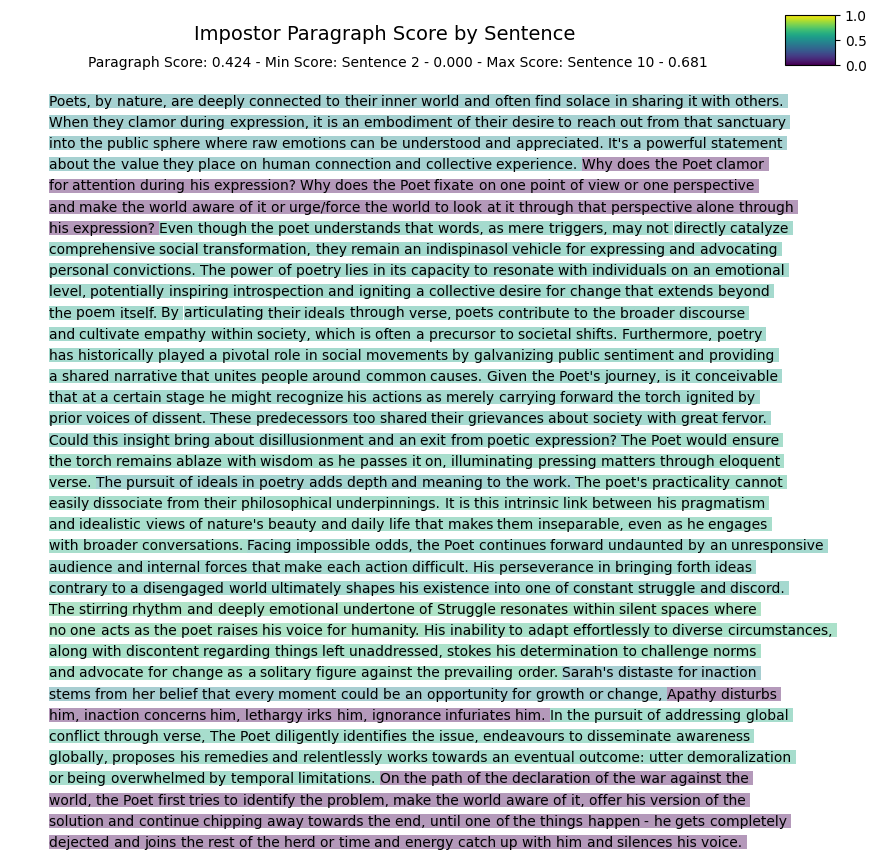

In [24]:
min_max_plot(result, "min", "/Users/user/Downloads/Imp_Paragraph_Min_Phi.png")

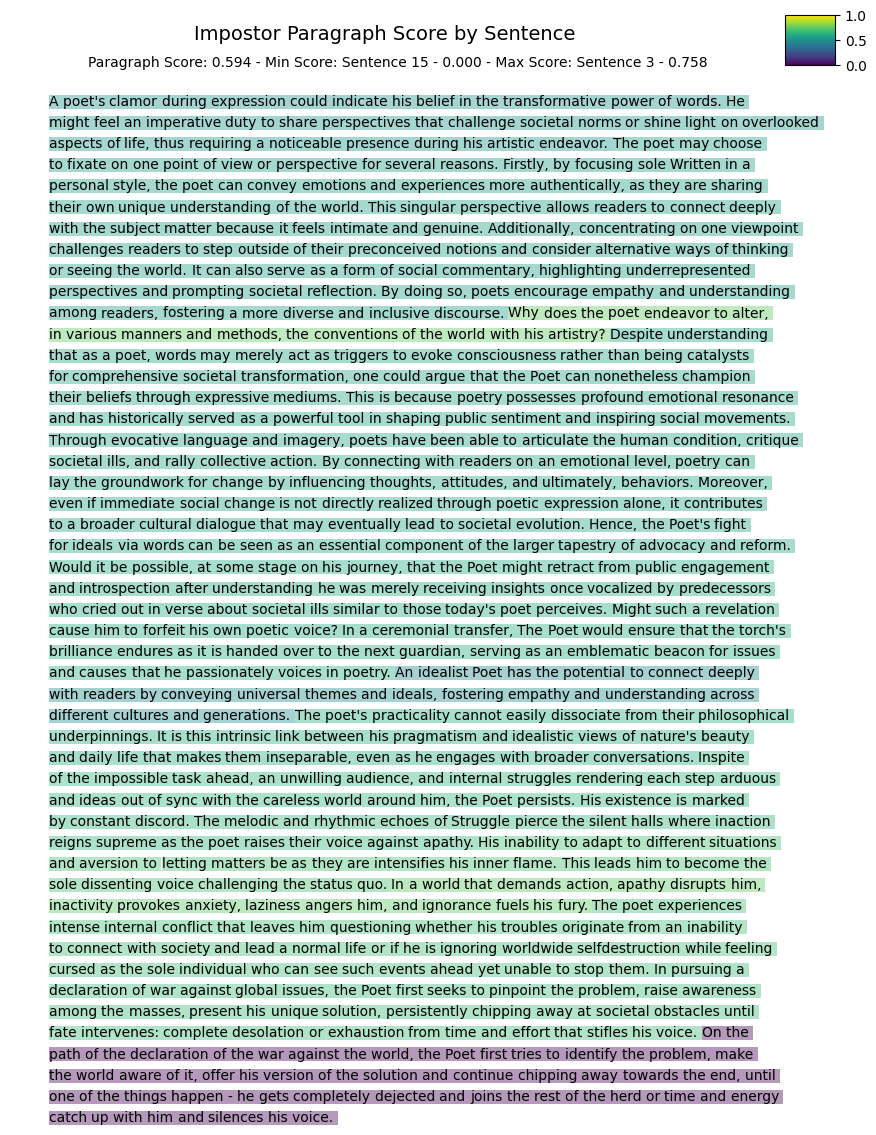

In [25]:
min_max_plot(result, "max", "/Users/user/Downloads/Imp_Paragraph_Max_Phi.png")

In [196]:
# result = process_and_combine(preprocessed_df, files, num_impostors=1000,
#                              score_table=True, score_col='parascore_free')

In [ ]:
result

In [ ]:
# read_and_write_docs.save_as_jsonl(result, "../../../datasets/blogger/gpt-4o-impostors-qual.jsonl")